In [1]:
#from __future__ import print_function
from glc import get_glyphs

In [2]:
bbox = get_glyphs(I)

NameError: name 'I' is not defined

In [ ]:
#bbox

In [ ]:
part = I
for i in range(0,len(bbox)):
    #print(part.shape)
    #print(i)
    #print(part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]])
    #plt.imshow(part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]]),plt.show()
    plt.imshow(z_pad(part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]])),plt.show()
    

In [ ]:
plt.imshow(ekg),plt.show()

In [ ]:

sz=60
sz1=1100
img=ekg
ekg1 = np.zeros((sz,sz1))
ekg1[(sz-img.shape[0])//2:img.shape[0]+(sz-img.shape[0])//2,(sz1-img.shape[1])//2:img.shape[1]+(sz1-img.shape[1])//2] = ekg

In [ ]:
bbox = get_glyphs(ekg1,ek=1)

In [ ]:
part = ekg1
for i in range(0,len(bbox)):
    #print(part.shape)
    #print(i)
    #print(part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]])
    #plt.imshow(part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]]),plt.show()
    plt.imshow((part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]])),plt.show()
    

In [ ]:
print(ekg1.shape)

In [3]:
def z_pad(img):
    sz = 20
    p_img = np.zeros((sz,sz))
    print(img.shape)
    try:
        p_img[(sz-img.shape[0])//2:img.shape[0]+(sz-img.shape[0])//2,(sz-img.shape[1])//2:img.shape[1]+(sz-img.shape[1])//2]=img
    except:
        p_img[(sz-img.shape[0])//2:img.shape[0]+(sz-img.shape[0])//2,(sz-img.shape[1])//2:img.shape[1]+(sz-img.shape[1])//2]=img
    return p_img
    

In [5]:

#print(data.columns)

All_File_info.xls


In [6]:
#         coords1 = np.array([np.arange(469,36,-1),np.arange(993,561,-1)])
#         #print(coords1.shape)
#         for i in coords1:
#             #print(coords1[i])
#             #break
#             img[:i[0],:i[1]]=0


In [ ]:
dic2= {}
dic2[]

In [ ]:
for i in dic:
    print(i)
    
    print('\n')
    
    print(dic[i])
#     for j in dic[i]:
#         print(j)
#         print(dic[i][j])
#         print('\n')

In [ ]:
print(dic)

In [1]:
import pandas as pd
path='/data/Gurpreet/Echo/Sorted_Images/'
import os
for a in os.listdir("/data/gabriel/OCR/"):
    #print(a)
    if('All' in a and 'lock' not in a):
        print(a)
        data = pd.ExcelFile("/data/gabriel/OCR/"+a,header=None).parse('Sheet1')
dic = {}

#a = np.unique(np.array(data[1]))
#print(a)

count = 0
#print(data.iloc[0])



for i in range(0,len(data)):
    #print(data[i])
    #print(data.iloc[i][0],data.iloc[i][1],data.iloc[i][2],data.iloc[i][3],data.iloc[i][4])
    temp = list(data.iloc[i])
    #print(temp)
    #print(temp[0],temp[1],temp[2],temp[3],temp[4])
    count+=1
    #if(temp[0])not in dic:
         #'EQo_62_22_13.jpg'
    #    dic[temp[0]] = {}
    
    if(str(temp[3])+' '+str(temp[4])+' '+str(temp[5]) not in dic):
        
        dic[str(temp[3])+' '+str(temp[4])+' '+str(temp[5])] = []
    
    dic[str(temp[3])+' '+str(temp[4])+' '+str(temp[5])].append('EQo_'+str(eval(temp[0]))+'_'+str(eval(temp[1]))+'_'+str(temp[2])+'.jpg')
    

lis={}
for i,j,k in os.walk('/data/Gurpreet/Echo/Sorted_Images'):
    #print(i)
    #print(j)
    #print(k)
    
    if len(j)==0:
        for z in k:
            #print(z)
            for s in dic:
                if z in dic[s]:
                    if(s not in lis):
                        lis[s]=[]
                    lis[s].append(z)
            #lis = {s:lis[s].append(z) for s in dic if z in dic[s]}
            #print(lis)
            #break
        #break
            
    #print(k)
rev_dic= {}
for i in lis:
    for j in lis[i]:
        if(j not in rev_dic):
            rev_dic[j]=None
        rev_dic[j]=i

All_File_info.xls


In [18]:
dic

{"'GE Healthcare Ultrasound' 1016 708": ['EQo_21_1_42.jpg',
  'EQo_21_10_33.jpg',
  'EQo_21_11_1.jpg',
  'EQo_21_12_40.jpg',
  'EQo_21_13_28.jpg',
  'EQo_21_14_1.jpg',
  'EQo_21_15_27.jpg',
  'EQo_21_16_49.jpg',
  'EQo_21_17_36.jpg',
  'EQo_21_18_44.jpg',
  'EQo_21_19_1.jpg',
  'EQo_21_2_34.jpg',
  'EQo_21_20_1.jpg',
  'EQo_21_21_37.jpg',
  'EQo_21_22_52.jpg',
  'EQo_21_23_42.jpg',
  'EQo_21_24_63.jpg',
  'EQo_21_25_50.jpg',
  'EQo_21_26_1.jpg',
  'EQo_21_27_39.jpg',
  'EQo_21_28_43.jpg',
  'EQo_21_29_1.jpg',
  'EQo_21_3_1.jpg',
  'EQo_21_30_52.jpg',
  'EQo_21_31_59.jpg',
  'EQo_21_32_63.jpg',
  'EQo_21_33_1.jpg',
  'EQo_21_34_1.jpg',
  'EQo_21_35_1.jpg',
  'EQo_21_36_67.jpg',
  'EQo_21_37_57.jpg',
  'EQo_21_38_34.jpg',
  'EQo_21_39_53.jpg',
  'EQo_21_4_51.jpg',
  'EQo_21_40_1.jpg',
  'EQo_21_41_1.jpg',
  'EQo_21_42_1.jpg',
  'EQo_21_44_1.jpg',
  'EQo_21_45_1.jpg',
  'EQo_21_46_43.jpg',
  'EQo_21_47_1.jpg',
  'EQo_21_48_23.jpg',
  'EQo_21_49_58.jpg',
  'EQo_21_5_1.jpg',
  'EQo_21_50_43

In [44]:
#print(rev_dic)

In [5]:
subd = ['PSA', 'SCX', 'SSX', 'A4C', 'A2C', 'PLA', 'A3C']
for i in subd:
    #print(i)
    for j in rev_dic.keys():
        if j in os.listdir('/data/Gurpreet/Echo/Sorted_Images/' + i):
            #print(j)
            #print(rev_dic[j])
            #print(rev_dic[j][1:-9])
            #print(rev_dic[j][-7:-4])
            #print(rev_dic[j][-3:])
            img,ekg = get_echo(img=plt.imread('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j),company=rev_dic[j][1:-9],R = int(rev_dic[j][-7:-4]),C = int(rev_dic[j][-3:]),ocr_flag=1 )
            get_text_part(img)
            break

NameError: name 'get_echo' is not defined

In [ ]:

a = plt.imread('/data/gabriel/img2.jpeg')
print(a.shape)
get_echo(a[:,:,0],'TOSHIBA_MEC_US',960,720)

In [ ]:
for k in os.listdir('/data/Gurpreet/Echo/Sorted_Images/'):
    for l in os.listdir('/data/Gurpreet/Echo/Sorted_Images/'+k)
        for i in dic:
            for j in dic[i]:
                #print(i,j)


In [ ]:
from cv2 import 

In [ ]:
print(dic)

In [1]:
import pytesseract

ModuleNotFoundError: No module named 'pytesseract'

All_File_info.xls
PSA
PSA
EQo_94_19_42.jpg


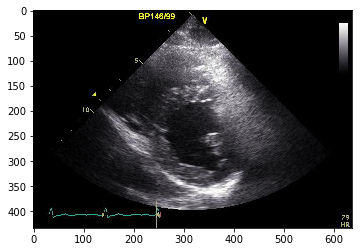

hererer


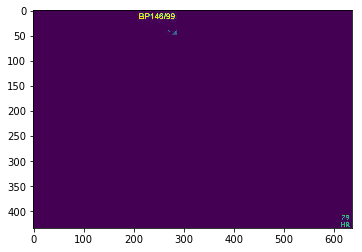

ValueError: Images of type float must be between -1 and 1.

In [1]:
import skimage.io as io

from skimage.filters import threshold_mean as tm
from skimage.filters import threshold_otsu as to
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_uint
from conv import *
from skimage import io
from glc import *

import pandas as pd
path='/data/Gurpreet/Echo/Sorted_Images/'
import os
for a in os.listdir("/data/gabriel/OCR/"):
    #print(a)
    if('All' in a and 'lock' not in a):
        print(a)
        data = pd.ExcelFile("/data/gabriel/OCR/"+a,header=None).parse('Sheet1')
dic = {}

#a = np.unique(np.array(data[1]))
#print(a)

count = 0
#print(data.iloc[0])



for i in range(0,len(data)):
    #print(data[i])
    #print(data.iloc[i][0],data.iloc[i][1],data.iloc[i][2],data.iloc[i][3],data.iloc[i][4])
    temp = list(data.iloc[i])
    #print(temp)
    #print(temp[0],temp[1],temp[2],temp[3],temp[4])
    count+=1
    #if(temp[0])not in dic:
         #'EQo_62_22_13.jpg'
    #    dic[temp[0]] = {}
    
    if(str(temp[3])+' '+str(temp[4])+' '+str(temp[5]) not in dic):
        
        dic[str(temp[3])+' '+str(temp[4])+' '+str(temp[5])] = []
    
    dic[str(temp[3])+' '+str(temp[4])+' '+str(temp[5])].append('EQo_'+str(eval(temp[0]))+'_'+str(eval(temp[1]))+'_'+str(temp[2])+'.jpg')
    

lis={}
for i,j,k in os.walk('/data/Gurpreet/Echo/Sorted_Images'):
    #print(i)
    #print(j)
    #print(k)
    
    if len(j)==0:
        for z in k:
            #print(z)
            for s in dic:
                if z in dic[s]:
                    if(s not in lis):
                        lis[s]=[]
                    lis[s].append(z)
            #lis = {s:lis[s].append(z) for s in dic if z in dic[s]}
            #print(lis)
            #break
        #break
            
    #print(k)
rev_dic= {}
for i in lis:
    for j in lis[i]:
        if(j not in rev_dic):
            rev_dic[j]=None
        rev_dic[j]=i

def extract_text():
    subd = ['PSA', 'SCX', 'SSX', 'A4C', 'A2C', 'PLA', 'A3C']
    count=0
    for i in subd:
        #print(i)
        count+=1
        print(i)
        for j in rev_dic.keys():
            print(i)
            print(j)
            if j in os.listdir('/data/Gurpreet/Echo/Sorted_Images/' + str(i) ):
                #print(j)
                #print(rev_dic[j])
                #print(rev_dic[j][1:-9])
                #print(rev_dic[j][-7:-4])
                #print(rev_dic[j][-3:])
                
                rimg = plt.imread('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j)
                plt.imshow(rimg,cmap='gray'),plt.show()
                ok = get_echo(rimg=plt.imread('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j),company=rev_dic[j][1:-9],R = int(rev_dic[j][-7:-4]),C = int(rev_dic[j][-3:]),ocr_flag=0)
                io.imsave('/data/gabriel/OCR/test'+str(count)+'.png',(ok)) 
                
                plt.imshow(ok,cmap='gray'),plt.show()
                im,ekg = get_echo(rimg=plt.imread('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j),company=rev_dic[j][1:-9],R = int(rev_dic[j][-7:-4]),C = int(rev_dic[j][-3:]),ocr_flag=1)
                io.imsave('/data/gabriel/OCR/test'+str(count)+'.png',(im)) 
                io.imsave('/data/gabriel/OCR/test'+str(count)+'.png',(ekg)) 
                #print(im)
                print(i)
                print('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j)
                print(rev_dic[j])
                plt.imshow(im,cmap='gray'),plt.show()
                #io.imsave('/data/gabriel/OCR/test'+str(count)+'.png',(im)) 
                #im = 0.2989*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,1]
                #im = img_as_uint(im)
                thresh = to(im)
                
                binary = im>thresh
                plt.imshow(binary,cmap='gray'),plt.show()
                io.imsave('/data/gabriel/OCR/test'+str(count)+'.png',(binary)) 
                
                print(binary.shape)
                print(type(binary))
                bbox = get_glyphs(binary)
                #break
                
                #im=img_as_uint(im)
                
                #bbox = get_glyphs(binary)
                part=im
#                 for p in range(0,len(bbox)):
#                 #print(part.shape)
#                 #print(i)
#                 #print(part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]])
#                 #plt.imshow(part[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]]),plt.show()
#                     plt.imshow(binary[bbox[i][0]:bbox[i][2],bbox[i][1]:bbox[i][3]],cmap='gray'),plt.show()
#                     count+=1
#                     t_img = z_pad(binary[bbox[p][0]:bbox[p][2],bbox[p][1]:bbox[p][3]])
#                     io.imsave('/data/gabriel/OCR/'+str(count)+'.png',t_img) 
                    #det_text = np.zeros()
    #for i in range(0,len(bbox)):
extract_text()       